#Trabajo Practico
/* Mateo Gravi Fiorino - Alejo Lomenzo


# Abrir dataset e importar librerias

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Apertura del dataset.

In [98]:
df = pd.read_csv("Crop_recommendation.csv")
df['label'] = df['label'].astype('category')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# Analisis exploratorio

In [99]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [100]:
df.dtypes

N                 int64
P                 int64
K                 int64
temperature     float64
humidity        float64
ph              float64
rainfall        float64
label          category
dtype: object

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   N            2200 non-null   int64   
 1   P            2200 non-null   int64   
 2   K            2200 non-null   int64   
 3   temperature  2200 non-null   float64 
 4   humidity     2200 non-null   float64 
 5   ph           2200 non-null   float64 
 6   rainfall     2200 non-null   float64 
 7   label        2200 non-null   category
dtypes: category(1), float64(4), int64(3)
memory usage: 123.3 KB


In [102]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [103]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Matriz de correlacion.

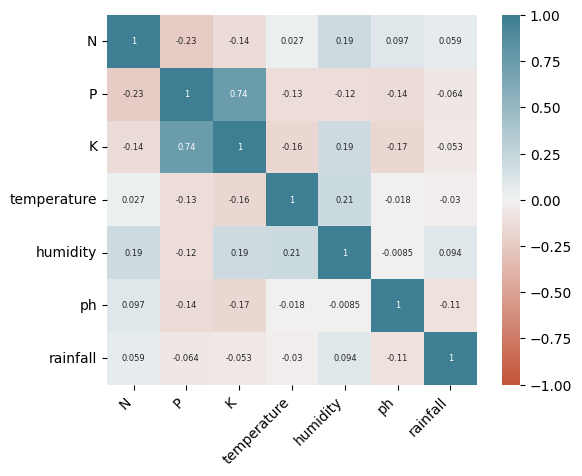

In [104]:
corr = df.drop(['label'], axis=1).corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

# PCA


PCA sobre label

In [105]:
df_sub = df.drop(['label'], axis=1)
df_std = (df_sub-df_sub.mean())/df_sub.std()
df_std

,N,P,K,temperature,humidity,ph,rainfall
0,1.068554,-0.344472,-0.101664,-0.935374,0.472559,0.043292,1.809949
1,0.933117,0.140584,-0.141153,-0.759473,0.396961,0.734706,2.241548
2,0.255928,0.049636,-0.081920,-0.515781,0.486843,1.771108,2.920402
3,0.635154,-0.556684,-0.160897,0.172768,0.389717,0.660158,2.536471
4,0.743504,-0.344472,-0.121409,-1.083401,0.454688,1.497527,2.897714
...,...,...,...,...,...,...,...
2195,1.529043,-0.587000,-0.318850,0.228762,-0.227657,0.401303,1.352129
2196,1.312342,-1.163004,-0.417571,0.355639,-0.666796,-0.494300,0.445081
2197,1.827006,-0.617316,-0.358338,-0.293152,-0.191192,-0.138089,1.271129
2198,1.799918,-0.647632,-0.279362,0.129583,-0.869320,0.373819,0.431447


Componentes principales para PCA + dataframe

In [106]:
# Obtener todas las componentes principales
pca = PCA(n_components=df_sub.shape[1], random_state=0)

pca_features = pca.fit_transform(df_std)

# PC dataframe
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
pca_df['label'] = df['label']
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,label
0,-0.582737,-0.844394,1.373031,-1.613762,0.308154,-0.095975,-0.025234,rice
1,-0.474527,-0.784716,1.251893,-1.792355,1.107493,-0.532134,-0.280479,rice
2,-0.633924,-0.694365,1.179064,-1.817692,2.522690,-0.538428,-0.105943,rice
3,-1.047682,-1.087411,1.393035,-0.982177,1.448452,-0.656779,0.275209,rice
4,-0.873059,-0.658523,1.455354,-2.334481,1.959188,-0.317952,0.052728,rice
...,...,...,...,...,...,...,...,...
2195,-1.260634,-0.618222,0.711136,-1.014740,0.133200,-1.122004,0.306955,coffee
2196,-1.355275,-0.154008,0.701489,-0.197638,-0.898453,-0.771301,0.684801,coffee
2197,-1.158120,-0.640329,1.045602,-1.301545,-0.491653,-0.884927,0.203417,coffee
2198,-1.218911,0.052378,0.180814,-0.990274,-0.601252,-1.308669,0.509541,coffee


EigenVectors


In [107]:
pd.DataFrame(pca.components_, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], index=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
X1,-0.302191,0.643787,0.622607,-0.212428,-0.068483,-0.226943,-0.072532
X2,-0.334107,-0.034358,-0.283829,-0.359487,-0.737917,0.220657,-0.290158
X3,-0.112045,-0.109939,-0.163173,-0.248228,-0.213599,-0.548520,0.735267
X4,-0.541651,-0.046293,-0.154867,0.690826,-0.067171,-0.395700,-0.205318
X5,-0.507785,0.082331,0.033425,0.154865,0.128871,0.651881,0.518382
X6,-0.482904,-0.376847,-0.028967,-0.500418,0.547871,-0.125712,-0.239930
X7,-0.008473,-0.649104,0.692268,0.111282,-0.289624,0.040028,0.038577


Seleccionamos numeros de componentes principales

In [108]:
# Creamos función para acumular la varianza
def acumular(numbers):
     sum = 0
     var_c = []
     for num in numbers:
        sum += num
        var_c.append(sum)
     return var_c

In [109]:
var_c = acumular(pca.explained_variance_ratio_)
pca_rtd = pd.DataFrame({'Eigenvalues':pca.explained_variance_, 'Proporción de variancia explicada':pca.explained_variance_ratio_, 'Proporción acumulado de variancia explicada': var_c})
pca_rtd

,Eigenvalues,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,1.931218,0.275888,0.275888
1,1.293910,0.184844,0.460733
2,1.076509,0.153787,0.614520
3,1.022891,0.146127,0.760647
4,0.805928,0.115133,0.875780
5,0.676562,0.096652,0.972431
6,0.192981,0.027569,1.000000


**Criterios de selección:**
* Proporción de variancia acumulada (~75% -80%)​
* Criterio de Kaiser (eigenvalues > 1)​
* Gráfico del codo (Scree)

Varianza acumulada

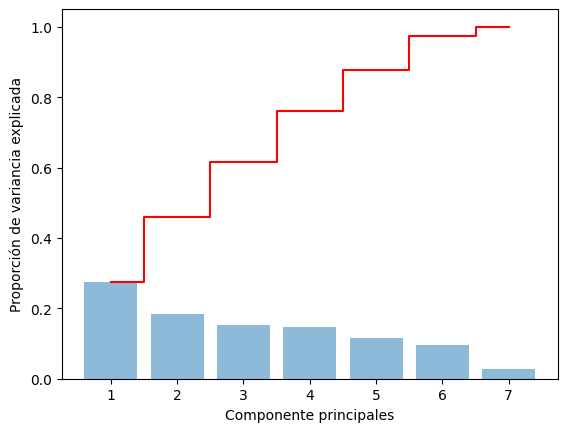

In [110]:
plt.bar(range(1,8), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(1,8), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componente principales')
plt.show()

*Grafico del codo*

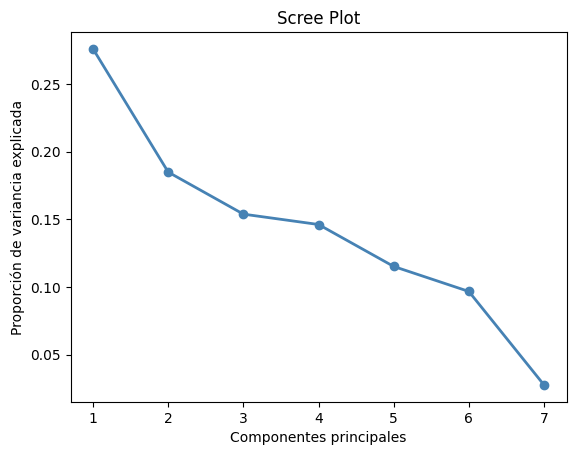

In [111]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='steelblue')
plt.title('Scree Plot')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de variancia explicada')
plt.show()

Matriz de correlacion para componentes seleccionados

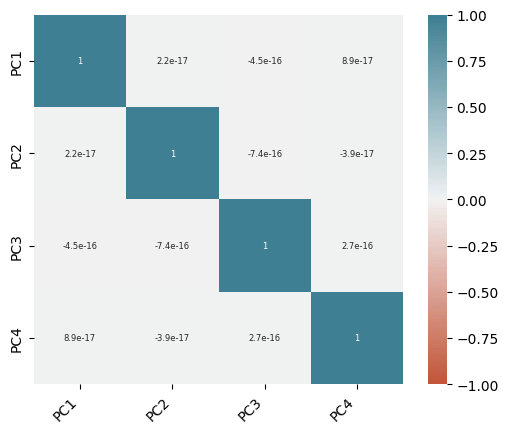

In [112]:
corr = pca_df[['PC1', 'PC2', 'PC3', 'PC4']].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

# Isomap


In [113]:
!pip install plotly-express

In [114]:
from sklearn.manifold import Isomap
import plotly.express as px

In [115]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [116]:
isomap_df = Isomap(n_neighbors=60, n_components=2)
isomap_df.fit(df_std)
projections_isomap = isomap_df.transform(df_std)

fig = px.scatter(
    projections_isomap, x=0, y=1,
    color=df['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

In [117]:
isomap_df = Isomap(n_neighbors=6, n_components=2)
isomap_df.fit(df_std)
projections_isomap = isomap_df.transform(df_std)

fig = px.scatter(
projections_isomap, x=0, y=1,
color=df['label'], labels={'color': 'label'}
)
    
fig.update_traces(marker_size=8)
fig.show()
    

c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_isomap.py:359: UserWarning:

The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:102: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:102: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:102: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

c:\Users\mateo\AppData\Local\Programs\Python\Py

# TSNE

In [118]:
from sklearn.manifold import TSNE

In [119]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [120]:
!pip install --upgrade nbformat

In [121]:
tsne = TSNE(n_components=2, random_state=0, perplexity=10)  # Aplicar t-SNE para reducir a 2 dimensiones
projections_tsne = tsne.fit_transform(df_std)

df_tsne = pd.DataFrame(projections_tsne, columns=['Componente 1', 'Componente 2']) # df datos transformados

df_tsne['label'] = df['label']  # Agregar la columna 'label' 

# Graficar los datos en 2D usando Plotly Express
fig = px.scatter(df_tsne, x='Componente 1', y='Componente 2', color='label', labels={'color': 'label'})
fig.update_traces(marker_size=5)
fig.update_layout(title='Visualización t-SNE en 2D')
fig.show()

# K-means

In [122]:
from sklearn.cluster import KMeans

Diagrama del codo. Identificar un punto en el gráfico donde la disminución en la suma de las distancias intraclúster (también conocida como inercia) comienza a disminuir de manera significativamente más lenta.
La inercia en K-means se calcula sumando las distancias cuadradas entre cada punto de datos y el centroide de su grupo asignado, y luego sumando estas distancias para todos los puntos en el conjunto de datos.

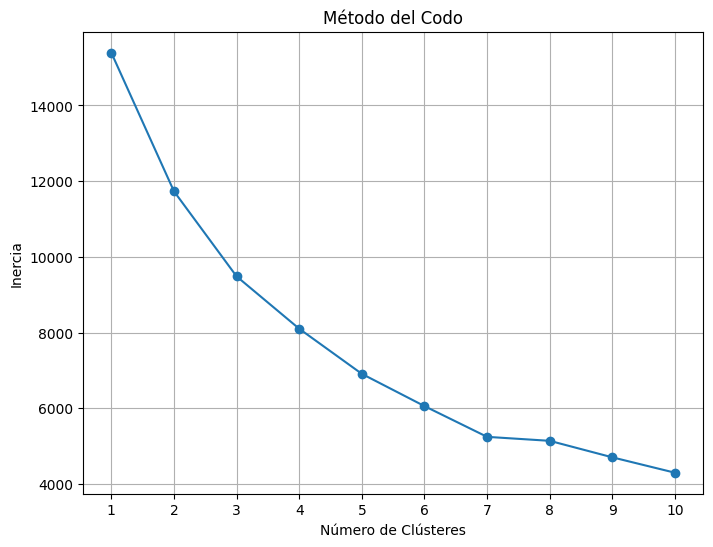

In [123]:
inercia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_std)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inercia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.xticks(np.arange(1, 11))
plt.grid(True)
plt.show()

#### Modelo

In [124]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_std) #Entrenamos el modelo

# El metodo labels_ nos da a que cluster corresponde cada observacion
df['Cluster KMeans'] = kmeans.labels_
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Cluster KMeans
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,2
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,2
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,2
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,2
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,2


#### Interpretaciones

In [125]:
observaciones_por_cluster = df['Cluster KMeans'].value_counts().sort_index()
observaciones_por_cluster

Cluster KMeans
0    200
1    797
2    618
3    585
Name: count, dtype: int64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   N               2200 non-null   int64   
 1   P               2200 non-null   int64   
 2   K               2200 non-null   int64   
 3   temperature     2200 non-null   float64 
 4   humidity        2200 non-null   float64 
 5   ph              2200 non-null   float64 
 6   rainfall        2200 non-null   float64 
 7   label           2200 non-null   category
 8   Cluster KMeans  2200 non-null   int32   
dtypes: category(1), float64(4), int32(1), int64(3)
memory usage: 131.9 KB


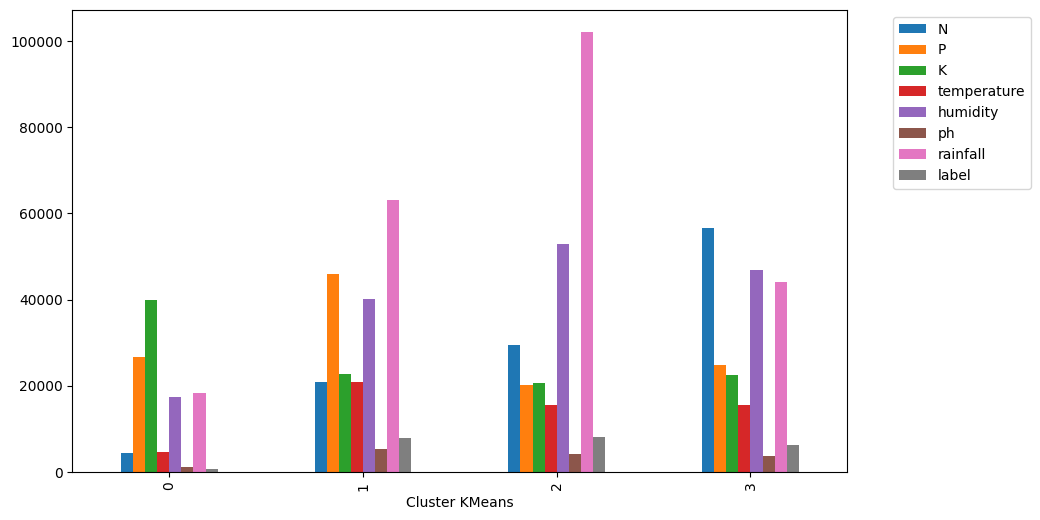

In [132]:
df['label'] = df['label'].cat.codes  # Convierte categorías a códigos numéricos
df.groupby('Cluster KMeans').sum().plot(kind='bar', figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#### Gap statistics

In [133]:
def calculate_intra_cluster_dispersion(X, k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    return kmeans.inertia_

In [134]:
gaps = []
max_k = 10
for k in range(1, max_k + 1):
    # Calculo la inercia real sobre mis datos reales
    real_inertia = calculate_intra_cluster_dispersion(df_std, k)
    #Calculo al inercia de datos aleatorios con la mismsa estrucutra que mis datos originales
    inertia_list = []
    for _ in range(10):
      random_data = np.random.rand(*df_std.shape)
      intra_cluster_dispersion = calculate_intra_cluster_dispersion(random_data, k)
      inertia_list.append(intra_cluster_dispersion)

    reference_inertia = np.mean(inertia_list)

    #Aplico la funcion de gap
    gap = np.log(reference_inertia) - np.log(real_inertia)
    gaps.append(gap)


optimal_k = np.argmax(gaps) + 1

Número óptimo de clusters según el Gap Statistic: 10


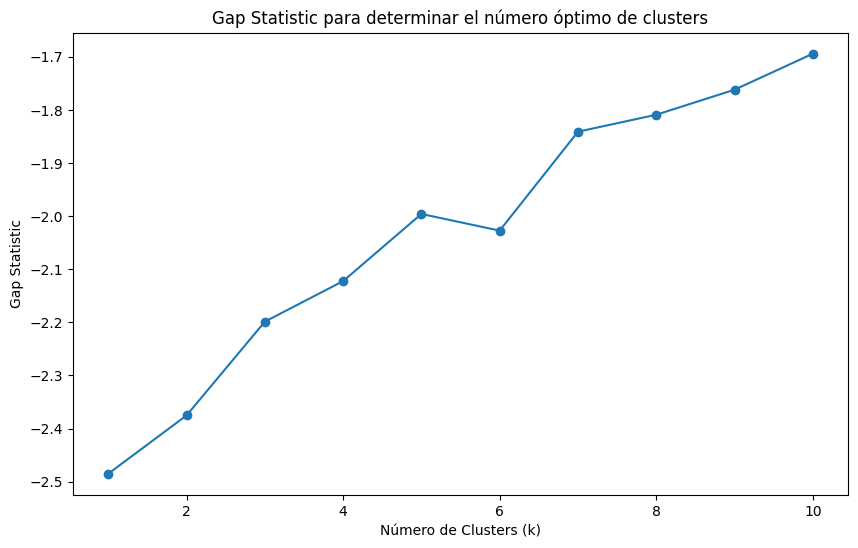

In [135]:
print("Número óptimo de clusters según el Gap Statistic:", optimal_k)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), gaps, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic para determinar el número óptimo de clusters')
plt.show()

#### Grafico 3d

In [138]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Cluster KMeans
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20,2
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20,2
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20,2
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20,2
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20,2


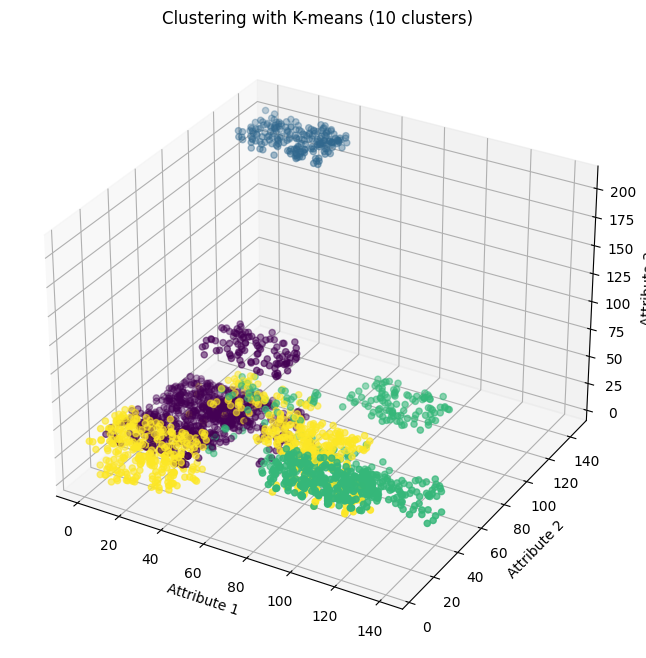

In [140]:
labels = kmeans.fit_predict(df_std)
# Crear una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos 3D y colorear por cluster
ax.scatter(df['N'], df['P'], df['K'], c=labels, cmap='viridis')

# Configurar etiquetas y título
ax.set_xlabel('Attribute 1')
ax.set_ylabel('Attribute 2')
ax.set_zlabel('Attribute 3')
ax.set_title('Clustering with K-means ({} clusters)'.format(optimal_k))

# Mostrar el gráfico
plt.show()